# Experiments - Tokens are only DIGITS 0,...,9 - Max Length = Infinity

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import chi2
from scipy.stats import ks_2samp

In [2]:
# 10k samples from PDFA obtained by Quantization Equivalence with kappa=100 and time bound of 30 seconds
PDFA_QNT = pd.read_csv('./results/PDFA_10k_length_n.csv')
# 10k samples from GPT2
LM = pd.read_csv('./results/llm_10k_length_n.csv')

## Number distribution

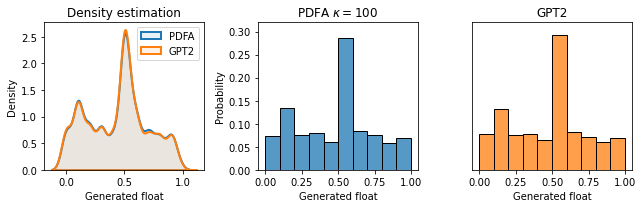

In [3]:
# Plot of histograms
B = 10
ymax = 0.32

fig, axes = plt.subplots(1, 3, figsize=(9,3))

sns.kdeplot(PDFA_QNT['floating-point'].values, fill=True, label='PDFA', color='tab:blue', alpha=0.1, linewidth=2, ax=axes[0])
sns.kdeplot(LM['floating-point'].values, fill=True, label='GPT2', color='tab:orange', alpha=0.1, linewidth=2, ax=axes[0])
axes[0].set_xlabel('Generated float')
axes[0].set_title('Density estimation')
axes[0].legend()

sns.histplot(PDFA_QNT['floating-point'].values, bins=B, stat='probability', color='tab:blue', legend=False, ax=axes[1])
axes[1].set_xlabel('Generated float')
axes[1].set_title(r'PDFA $\kappa=100$')
axes[1].set_ylim([0,ymax])

sns.histplot(LM['floating-point'].values, bins=B, stat='probability', color='tab:orange', legend=False, ax=axes[2])
axes[2].set_xlabel('Generated float')
axes[2].set_title('GPT2')
axes[2].set_ylim([0,ymax])
axes[2].set_yticks([])
axes[2].set_ylabel('')

plt.tight_layout()
plt.savefig('Histograms_Floats_QNT_kappa100.png')

In [4]:
# Chi2 test with 10 bins
B = 10

# Grouping the data
pdfa = np.histogram(PDFA_QNT, bins=B)[0]
lm = np.histogram(LM, bins=B)[0]

# Chi2 statistics
chi2_PDFA_LM = np.sum((pdfa-lm)**2/(pdfa+lm))
print(f'Chi2 PDFA vs LM : {chi2_PDFA_LM}')

# Degrees of freedom
df=B-1

# Chi2 pvalue
p_value_PDFA_LM = chi2.sf(chi2_PDFA_LM, df)
print(f'pvalue PDFA vs LM: {p_value_PDFA_LM}')

Chi2 PDFA vs LM : 6.973512509337853
pvalue PDFA vs LM: 0.639877255654497


In [5]:
# Chi2 test with 20 bins
B = 20

# Grouping the data
pdfa = np.histogram(PDFA_QNT, bins=B)[0]
lm = np.histogram(LM, bins=B)[0]

# Chi2 statistics
chi2_PDFA_LM = np.sum((pdfa-lm)**2/(pdfa+lm))
print(f'Chi2 PDFA vs LM : {chi2_PDFA_LM}')

# Degrees of freedom
df=B-1

# Chi2 pvalue
p_value_PDFA_LM = chi2.sf(chi2_PDFA_LM, df)
print(f'pvalue PDFA vs LM: {p_value_PDFA_LM}')

Chi2 PDFA vs LM : 18.441545346054806
pvalue PDFA vs LM: 0.4931483540990905


In [6]:
# KS test
ks, p_value = ks_2samp(PDFA_QNT['floating-point'].values, LM['floating-point'].values)

print("KS PDFA vs LM:", ks)
print("pvalue PDFA vs LM:", p_value)

KS PDFA vs LM: 0.0085
pvalue PDFA vs LM: 0.8629266196033867


## Length distribution

In [7]:
pdfa_len = PDFA_QNT['floating-point'].apply(lambda x: len(str(x))-2)
lm_len = LM['floating-point'].apply(lambda x: len(str(x))-2)

In [8]:
N = len(PDFA_QNT)

PDFA_LEN = pd.DataFrame(
    {
        'Model': ['PDFA']*N,
        'Length': pdfa_len.values
    }
)

LM_LEN = pd.DataFrame(
    {
        'Model': ['GPT2']*N,
        'Length': lm_len.values
    }
)

LENGTH = pd.concat([PDFA_LEN,LM_LEN], ignore_index=True, axis=0)

In [9]:
m = len(LENGTH.value_counts())

Model = [LENGTH.value_counts().index[i][0] for i in range(m)]
Length = [LENGTH.value_counts().index[i][1] for i in range(m)]
Probability = [LENGTH.value_counts()[i]/N for i in range(m)]

LENGTH_PROBA = pd.DataFrame(
    {
        'Model' : Model,
        'Length' : Length,
        'Probability' : Probability
    }
)

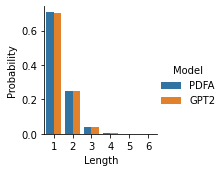

In [10]:
sns.catplot(x = 'Length',
            y='Probability',
            hue = 'Model',
            data=LENGTH_PROBA,
            kind='bar',
            height=2.5
            )
plt.savefig('Barplot_Length_kappa_100.png')

In [11]:
# KS test for Length
ks_length, p_value_length = ks_2samp(pdfa_len.values, lm_len.values)

print("KS LENGTH:", ks_length)
print("pvalue LENGTH:", p_value_length)

KS LENGTH: 0.0014
pvalue LENGTH: 0.9999999999999993
